# Problem 4: Introduction to cvxpy: inpainting
Prof: Veniamin Morgenshtern

Solver: Andy Regensky

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

1\. Read the image of Lena, lena512.png and lena512_corrupted.png. Display both.

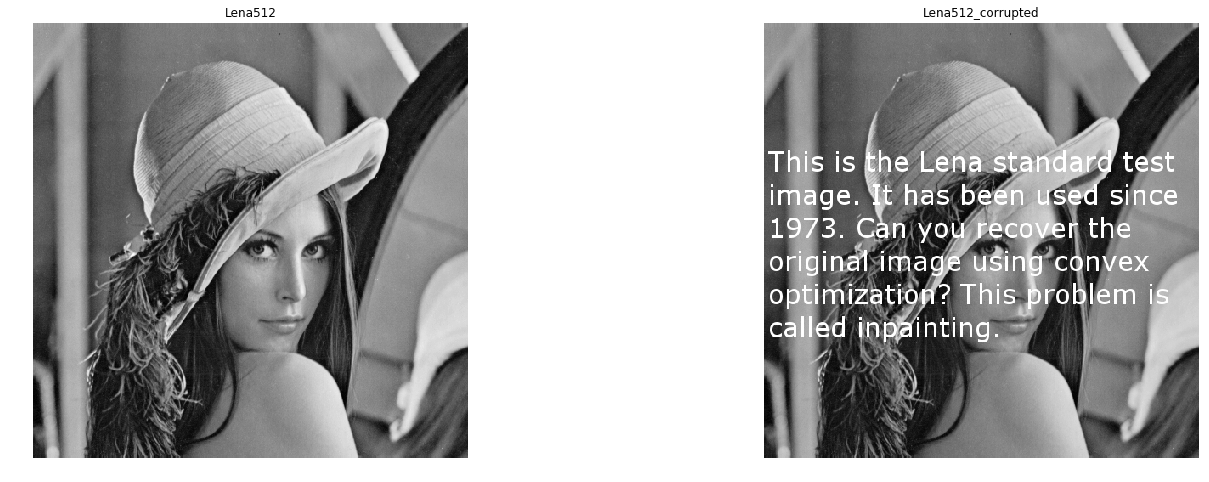

In [2]:
# Use PIL's Image.open to import the images and convert them to grayscale (The images are grayscale,
# but saved as RGB within the png file).
lena = np.asarray(Image.open("lena512.png").convert('L'))
lena_corrupted = np.asarray(Image.open("lena512_corrupted.png").convert('L'))

# Plot the images
plt.figure(figsize=(24,8))
plt.subplot(1, 2, 1)
plt.imshow(lena, cmap=plt.cm.gray)
plt.title("Lena512")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(lena_corrupted, cmap=plt.cm.gray)
plt.title("Lena512_corrupted")
plt.axis('off')
plt.show()

The goal is to reconstruct the original image based on the corrupted version and the locations of corruptions.

A grayscale image, lena512.png, is represented as an m × n matrix of intensities $\mathbf{U}^{orig}$ (typically between the values 0 and 255). We are given the values $\mathbf{U}^{orig}$, for (i, j) ∈ K, where K ⊂ {1, . . . , m}×
{1, . . . , n} is the set of indices corresponding to known pixel values. Our job is to in-paint the image
by guessing the missing pixel values, i.e., those with indices not in K. The reconstructed image will
be represented by  $\mathbf{U} \in \mathbb{R}^{m,n}$ where $\mathbf{U}$ matches the known pixels, i.e.,  $\mathbf{U}_{i,j} = \mathbf{U}_{i,j}^{orig}$ for (i,j) ∈ K.

The reconstruction $\mathbf{U}$ is found by minimizing the total variation of $\mathbf{U}$, subject to matching the known pixel values. We will use the l2 total variation, defined as
\begin{align}
    \text{tv}(\mathbf{U}) = \sum_{i=1}^{m-1}\sum_{j=1}^{n-1} \left\lvert\left\lvert\begin{bmatrix}
    U_{i+1,j}-U_{i,j} \\ U_{i,j+1}-U_{i,j} \end{bmatrix} \right\rvert\right\rvert_2
\end{align}

2\. Compute the set K by comparing the two images and determining where lena512 is different
from lena512_corrupted

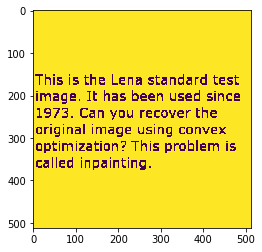

In [4]:
# np.where returns two arrays defining the rows and the columns of equal pixel values, respectively.
[rows, cols] = np.where(lena==lena_corrupted)
# Initialize K
K = np.zeros(lena.shape)
# Write a 1 to all positions in K corresponding to equal pixel values in lena512 and lena512_corrupted
K[rows, cols] = 1
plt.imshow(K)
plt.show()

3\. In cvxpy, implement the following convex optimization problem:
\begin{align}
    \min_\mathbf{U} &\text{ tv}(\mathbf{U}) \\
    \text{subject to } U_{i,j}&=U_{i,j}^{orig} \text{ for } (i,j)\in\mathcal{K}
\end{align}

In [5]:
# Setup the problem in cvxpy (Note that we use cvxpy version 1.0.6. If you use an older version, 
# this is likely to throw an error)
U = cp.Variable(shape=(lena.shape[0], lena.shape[1]))
objective = cp.Minimize(cp.tv(U))
constraints = [cp.multiply(K, U) == np.multiply(K, lena_corrupted)]
problem = cp.Problem(objective, constraints)

4\. Solve the problem using the SCS solver.

In [6]:
# Solve the problem in cvxpy and assign result to lena_reconstructed
problem.solve(verbose=True, solver=cp.SCS)
lena_reconstructed = U.value

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 1547594, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 523265, constraints m = 1045507
Cones:	primal zero / dual free vars: 262144
	soc vars: 783363, soc blks: 261121
Setup time: 1.32e-01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.33e+00  4.95e+00  1.00e+00 -1.49e+08  6.22e+06  3.51e-08  9.71e-01 
   100| 3.43e-03  1.35e-03  5.41e-03  2.16e+06  2.18e+06  4.13e-09  1.38e+01 
   200| 1.09e-03  2.52e-04  1.18e-03  2.20e+06  2.20e+06  4.25e-09  2.70e

5\. Display the reconstructed image. How accurate is your reconstruction?

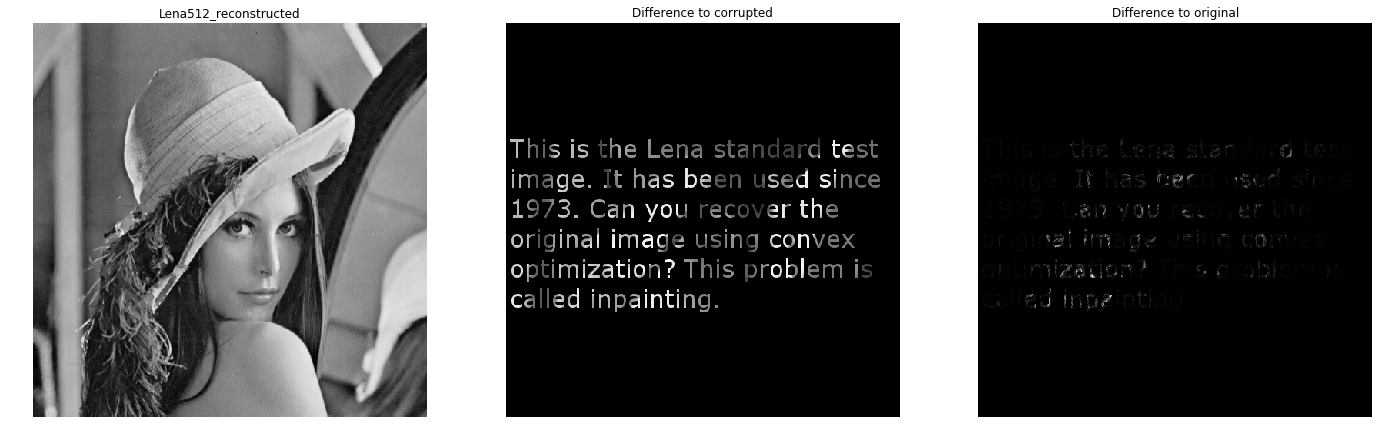

In [7]:
# Plot the reconstructed image, the difference between reconstructed and corrupted and the difference
# between reconstructed and original
plt.figure(figsize=(24,8))
plt.subplot(1, 3, 1)
plt.imshow(lena_reconstructed, cmap=plt.cm.gray)
plt.title("Lena512_reconstructed")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(10*np.abs(lena_reconstructed-lena_corrupted), cmap=plt.cm.gray)
plt.title("Difference to corrupted")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(10*np.abs(lena_reconstructed-lena), cmap=plt.cm.gray)
plt.title("Difference to original")
plt.axis('off')
plt.show()

6\. Substitute tv(U) with the Frobenius norm of U. Solve the problem and display your result. Was the reconstruction accurate now?

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 504134, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 262145, constraints m = 524289
Cones:	primal zero / dual free vars: 262144
	soc vars: 262145, soc blks: 1
Setup time: 4.87e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.87e+01  4.44e+01  1.00e+00 -2.71e+06  4.26e+06  7.19e-10  7.47e-02 
    40| 2.15e-05  2.16e-05  1.56e-05  6.54e+04  6.54e+04  2.57e-12  8.34e-01 
----------------------------------------------------------------------------
Sta

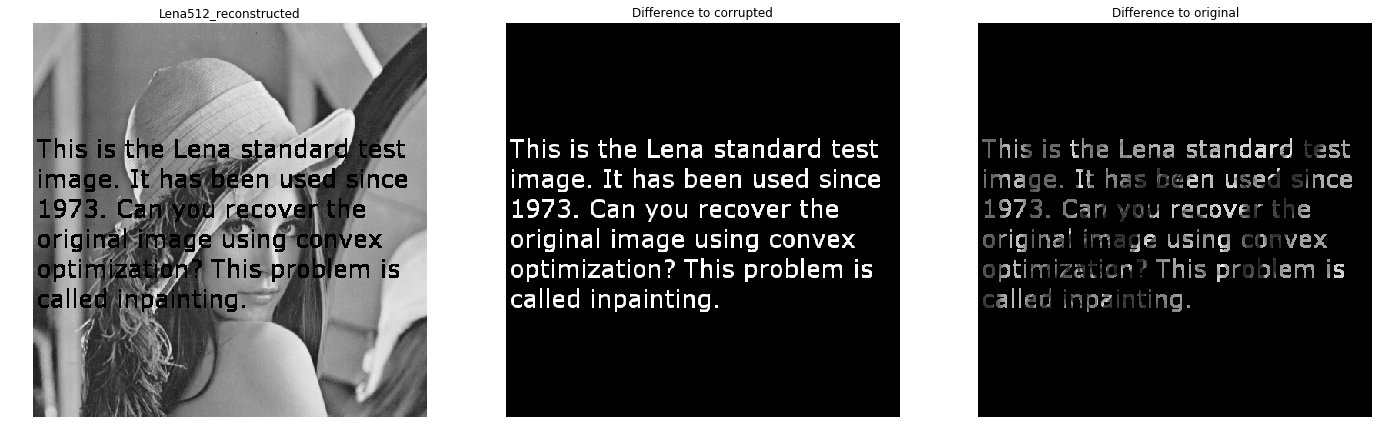

In [8]:
# Setup the problem in cvxpy using the frobenius norm
U_fro = cp.Variable(shape=(lena.shape[0], lena.shape[1]))
objective_fro = cp.Minimize(cp.norm(U_fro,"fro"))
constraints_fro = [cp.multiply(K, U_fro) == cp.multiply(K, lena_corrupted)]
problem_fro = cp.Problem(objective_fro, constraints_fro)

# Solve the problem in cvxpy and assign result to lena_reconstructed_fro
problem_fro.solve(verbose=True, solver=cp.SCS)
lena_reconstructed_fro = U_fro.value

# Plot the reconstructed image (obtained by minimizing the frobenius norm), the difference between reconstructed 
# and corrupted and the difference between reconstructed and original
plt.figure(figsize=(24,8))
plt.subplot(1, 3, 1)
plt.imshow(lena_reconstructed_fro, cmap=plt.cm.gray)
plt.title("Lena512_reconstructed")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(10*np.abs(lena_reconstructed_fro-lena_corrupted), cmap=plt.cm.gray)
plt.title("Difference to corrupted")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(10*np.abs(lena_reconstructed_fro-lena), cmap=plt.cm.gray)
plt.title("Difference to original")
plt.axis('off')
plt.show()